<a href="https://colab.research.google.com/github/Tadesse-Destaw/Normalization/blob/main/NLP_Preprocessing_and_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amharic Text Preprocessing & Tokinization

In [52]:
!pip install flair
!pip install sweetviz
!pip install Unidecode
!pip install emoji
!pip install python-Levenshtein
!pip install import-ipynb

In [3]:
import sys
sys.path.append('../')

In [4]:
import importlib
from IPython.display import display
import sweetviz
import re
import random
import pandas as pd
import warnings
import unidecode
import numpy as np
import glob
import csv
import emoji
from typing import List
from flair.data import Token
from Levenshtein import distance 
import import_ipynb
from preprocessing.amharicSegmenter import AmharicSegmenter
from normalizer import normalize
warnings.filterwarnings('ignore')

importing Jupyter notebook from normalizer.ipynb


In [9]:
def normalize(data):
    normal = unicodedata.normalize('NFKD', data).encode('ASCII', 'ignore')
    return(normal.decode())

In [55]:
#May_news_DF.Content[1]

# Generate Homophone words from the corpus




In [33]:
hm1 =['ሀ','ሃ','ኀ','ኃ','ሐ','ሓ']
hm2 =['ሁ','ሑ','ኁ']
hm3 =['ህ','ሕ','ኅ']
hm4 =['ሰ','ሠ']
hm5 =['ስ','ሥ']
hm6 =['አ','ኣ','ዐ','ዓ']
hm7 =['ፀ','ጸ']
hm8 =['ፅ','ጽ']

In [34]:
df = pd.read_csv("MayNews_Content.csv")
df =pd.DataFrame(df)

In [35]:
#Converting Dataframe to Lists
#News = df[df.Content.str.contains('|'.join(hm1))]
#News['Content'] = News.Content.apply(lambda x: str(x).split())
list_of_words = df['Content'].str.split(' ').to_list()

In [ ]:
print (len(list_of_words))

In [36]:
#Converting Lists to Pandas Series
pd_series = pd.Series(list_of_words)
pd_series = pd_series.apply(pd.Series).stack().reset_index(drop = True) 
series_List = pd_series[pd_series.str.contains('|'.join(hm1))]            #words contains hml only


In [39]:
series_List

23           ሀገር
101        በሀገሪቱ
129         ፍትሃዊ
152          ሀብት
206         ሓርነት
           ...  
1747568      ከሃና
1747609     በገሃድ
1747646       ሃና
1747661     በረሃብ
1747832     ሃጥያት
Length: 38082, dtype: object

In [40]:
#Remove duplicated Valuees
test_words = set(series_List)
print (len(test_words))

4934


In [41]:
target_word = 'ሀገር'
for hm in hm1:
  position=target_word.index(hm)
  if position >=0:
    break
target_word[:position] + '' + target_word[position+1:]

'ገር'

In [42]:
words=set()
def match(target_word):
  for word in test_words:
    search_word =word.replace('|'.join(hm1),'')
    if distance(target_word, search_word) <=1:
      words.add(search_word)
match(target_word)       
print (words)

{'ሀገርኛ', 'ሀገሬ', 'ሀቶር', 'ሀገር!', 'ሀገርና', 'ሀረር', 'ሀገሩ', 'ሀገርም', 'ሐገር', 'ሀገረ', 'ከሀገር', 'ሀገር', 'ሀገርን', 'ሃገር', 'ሀር', 'ሀወር', 'ሀገ', 'ኃገር', 'በሀገር', 'ለሀገር', 'ሀንገር', 'የሀገር', 'ሀገሯ'}


Text(0.5, 1.0, 'Distribution of characters in words')

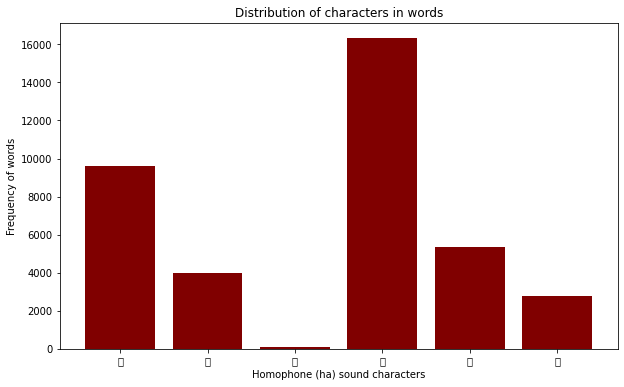

In [57]:
import matplotlib.pyplot as plt  
series_List1 = pd_series[pd_series.str.contains('ሀ')] 
ሀ=len(series_List1)
series_List2 = pd_series[pd_series.str.contains('ሐ')] 
ሐ=len(series_List2)
series_List3 = pd_series[pd_series.str.contains('ኀ')] 
ኀ=len(series_List3)
series_List4 = pd_series[pd_series.str.contains('ሃ')] 
ሃ=len(series_List4)
series_List5 = pd_series[pd_series.str.contains('ሓ')] 
ሓ=len(series_List5)
series_List6 = pd_series[pd_series.str.contains('ኃ')] 
ኃ=len(series_List6)
data = {}
for variable in ["ሀ", "ሐ", "ኀ","ሃ","ሓ","ኃ"]:
    data[variable] = eval(variable)
import operator
sorted_d = sorted(data.items(), key=operator.itemgetter(1))
characters = list(data.keys()) 
no_words = list(data.values()) 
   
fig = plt.figure(figsize = (10, 6)) 
# creating the bar plot 
plt.bar(characters, no_words, color ='maroon') 
  
plt.xlabel("Homophone (ha) sound characters") 
plt.ylabel("Frequency of words") 
plt.title("Distribution of characters in words") 
#plt.show()

## Homophone word Occurance Statistics

In [ ]:
homo_word = 'ሐገር'
result = list(filter(lambda x: homo_word in x, series_List))
#result = [i for i in series_List if homo_word in i] 
print (len(result))


## Print homophone words with context (the whole sentence)

In [42]:
f = open("all_sentences.txt", "r",encoding="utf-8")
content = f.read()
list_of_sentences = content.splitlines()
f.close()
#df = pd.read_csv("all_sentences.txt")
#News['Content'] = News.Content.apply(lambda x: str(x).split('([፡፡።?!])'))
#list_of_sentences = df['Content'].str.split('([፡፡።?!])').to_list()
sentences_series = pd.Series(list_of_sentences)
sentences_series = sentences_series.apply(pd.Series).stack().reset_index(drop = True) 
tagret_sentences = sentences_series[sentences_series.str.contains("ሀገር")]

In [43]:
tagret_sentences

1        በአስር ሺዎች የሚቆጠሩት ሰዎች ቀያቸውን ለቀው ወደ ጎረቤት ሀገር ወደ ሱ...
18       መጭው አዲስ ዓመት 2021 እና አፍሪቃ በአስቸጋሪ ሁኔታ የሚካሄዱ ምርጫዎ...
106      የቀድሞ የደርግ ባለስልጣናት ከ30 ዓመት በኋላ ተናገሩ በተለይ ለአዲስ አ...
578      በብልፅግና የሚመራው መንግስት ህዝብን ከህዝብ ለማጋጨት በሃይማኖታዊ እና ...
584      በብልፅግና የሚመራው መንግስት ህዝብን ከህዝብ ለማጋጨት በሃይማኖታዊ እና ...
                               ...                        
69209    እነዚህ ሁለት መሰረታዊ ጉዳዮች ማንም በቀላሉ ሊታዘበው የሚችልና እነሱም ...
69217    የቅናት ስሜት የተሰማኝ ለወገኖች ለሀገሬም ሆነ ለመንግስት እያበረከትኩት ...
69236    ማህበራዊ ኑሮአችን ግድ የሚሉንና ለተለያዩ የሀገር ግንባታ አላማዎች ከመን...
69243    ዳያስፖራዎች ካሉበት ሀገር እዚህ አገር ቤት ላሉት ዘመድ ወዳጆቻቸው የሚል...
69249    ከእኛ ሀገር ዳያስፖራዎች ይህን ያህል ዶላር በየወሩ የሚልክ ምን ያህሉ ይሆን?
Length: 713, dtype: object

In [ ]:
#homo_word = df[df['Content'].str.contains("ድህነት")]
#print("ድህነት", len(homo_word))
#ድህነት,ኅብር,ሕብር,ሳለ,ሣለ,ሰረገ,ሠረገ,ሰየመ,ሠየመ

In [52]:
file = open("all_sentences.txt", "r",encoding="utf-8")
read_file = file.read()
content = read_file.split("\n")
sentence_count = 0
for line in content:
    if line != "\n":
        sentence_count += 1.
    file. close()
print (sentence_count)

71764.0


## Homophone Characters Occurance

In [ ]:
#ሀ,ሃ,ኀ,ኃ,ሐ,ህ,ሕ,ኅ,አ,ዐ,ዓ,ሰ,ሠ,ሳ,ሣ,ስ,ሥ,ጸ,ፀ
hom_char = 0
for item in series_List:
    if 'ሃ' in item:
        hom_char = hom_char + 1
print(hom_char)

# Normalize based on frequency

In [ ]:
May_news_DF.Content = May_news_DF.Content.apply(lambda x: normalizef(x))

# Normalize based on litrature



In [ ]:
May_news_DF.Content = May_news_DF.Content.apply(lambda x: normalize(x))
#May_news_DF.Content[0:10]